In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

In [4]:
archivo = pd.read_csv('reporcol.csv')
archivo.head()

,Poliza,Cobertura,Ramo,Moda,A?O_POLIZA,SEXO,EDAD_CALC,NO_ASEG,PMAVALUAR,SA_PREVIA,...,TIEMPO,C_EXT,C_DIV,FP_POLIZA,PLAN,IGC,F_EMI,NOMBREPLAN,DESC_ESTADO,DIVISION
0,1.500405e+12,BASICA,150,606,5,M,62,1,3380.75,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
1,1.500405e+12,BASICA,150,606,5,F,58,2,1778.25,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
2,1.500405e+12,BASICA,150,606,5,M,59,3,2544.50,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
3,1.500405e+12,BASICA,150,606,5,M,44,4,753.25,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
4,1.500405e+12,BASICA,150,606,5,M,54,5,1632.25,250000,...,R,N,N,1,T,C,20040601,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE


In [5]:
# Cleaning DataFrame making sure that there is not numeric variables
categorical_df = archivo.head(1000)
categorical_df = categorical_df.loc[:,['Cobertura','SEXO','ADMON','TIEMPO','NOMBREPLAN','DESC_ESTADO','DIVISION']]
categorical_df.head()

,Cobertura,SEXO,ADMON,TIEMPO,NOMBREPLAN,DESC_ESTADO,DIVISION
0,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
1,BASICA,F,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
2,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
3,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE
4,BASICA,M,N,R,SEGURO COLECTIVO CON TRIFA ESPECIAL (AGENTES),JALISCO,DIVISION OCCIDENTE


In [6]:
# DataFrame into array
dataset =  categorical_df.values

In [7]:
# split array into input and output variables
X = dataset[:, :-1]
y = dataset[:,-1]

In [9]:
# ensure X is always a string
X = X.astype(str)
# remodelar el objetivo para que sea una matriz 2D
y = y.reshape ((len (y), 1))

[['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION OCCIDENTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['DIVISION NOROESTE']
 ['CUENTAS INSTITUCIONALES']
 ['

In [68]:
# divide set in two parts = train and test 
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [69]:
# verify the two new sets
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (800, 6) (800, 1)
Test (200, 6) (200, 1)


In [70]:
# Prepare input characteristics
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    enc = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [71]:
# Prepare output characteristics
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [72]:
# Prepearing input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Prepearing output data
y_train_enc = np.ravel(y_train_enc)
y_test_enc = np.ravel(y_test_enc)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

C:\Users\mrchu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mrchu\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [74]:
# Selección de características con chi-squared
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 184.958708
Característica 1: 1.970474
Característica 2: 562.792793
Característica 3: 19.972754
Característica 4: 925.933682
Característica 5: 401.655738


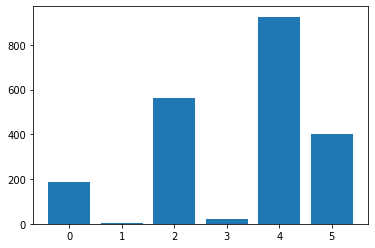

In [75]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [76]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [77]:
# Selección de características con mutual information
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 0.130090
Característica 1: 0.000000
Característica 2: 0.277742
Característica 3: 0.114608
Característica 4: 0.427557
Característica 5: 0.840961


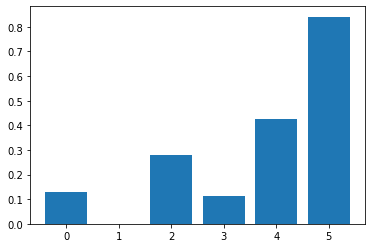

In [78]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()